In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [1]:
# Load the Iris dataset
iris_data = load_iris()

# The data is stored in the .data attribute, which is a numpy array
X = iris_data.data

# The target labels are stored in the .target attribute
y = iris_data.target


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
X

Logistic Regression without Grid Search

In [14]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
print('confusion matrix:')
print(confusion_matrix(y_test, y_pred))
print('accuracy: ',accuracy_score(y_test, y_pred))


confusion matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
accuracy:  1.0


In [17]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
print('confusion matrix:')
print(confusion_matrix(y_test, y_pred))
print('accuracy: ',accuracy_score(y_test, y_pred))


confusion matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
accuracy:  1.0


 Logistic Regression with Grid Search

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

confusion matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
accuracy:  1.0
Tuned Logistic Regression Parameters: {'C': 0.4393970560760795}
Best score is 0.9583333333333334


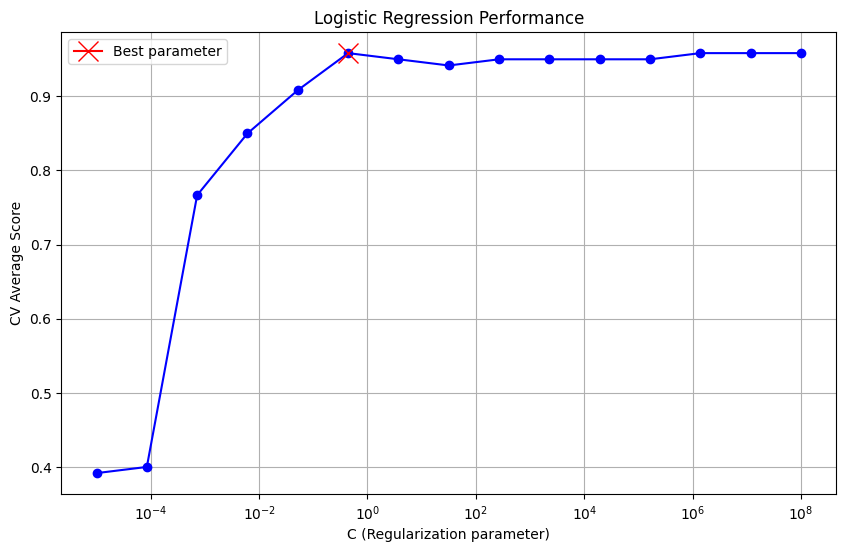

In [42]:
from sklearn.model_selection import GridSearchCV
import numpy as np

# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

#EVALUATION
print('confusion matrix:')
print(confusion_matrix(y_test, y_pred))
print('accuracy: ',accuracy_score(y_test, y_pred))

print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

mean_scores = logreg_cv.cv_results_['mean_test_score']

# Plotting
plt.figure(figsize=(10, 6))
plt.semilogx(c_space, mean_scores, marker='o', color='b', linestyle='-')
plt.semilogx(logreg_cv.best_params_['C'], logreg_cv.best_score_, marker='x', markersize=15, color='r', label='Best parameter')
plt.xlabel('C (Regularization parameter)')
plt.ylabel('CV Average Score')
plt.title('Logistic Regression Performance')
plt.legend()
plt.grid(True)
plt.show()

SVM without Grid Search


In [43]:
#SVM REGRESSION
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
svm_reg = SVR(kernel="linear")
svm_reg.fit(X_train, y_train)
y_pred = svm_reg.predict(X_test)
svm_mse = mean_squared_error(y_test, y_pred)
svm_rmse = np.sqrt(svm_mse)
print(svm_rmse)

0.19038337929821722


In [40]:
#SVM CLASSIFICATION
from sklearn.svm import SVC
svm_class = SVC(kernel="linear")
svm_class.fit(X_train, y_train)
y_pred = svm_class.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [35]:
#SVM REGRESSION WITH KERNAL POLY
svm_reg = SVR(kernel="poly")
svm_reg.fit(X_train, y_train)
y_pred = svm_reg.predict(X_test)
svm_mse = mean_squared_error(y_test, y_pred)
svm_rmse = np.sqrt(svm_mse)
print(svm_rmse)

0.25344496622428336


In [34]:
#SVM REGRESSION WITH KERNAL RBF
svm_reg = SVR(kernel="rbf")
svm_reg.fit(X_train, y_train)
y_pred = svm_reg.predict(X_test)
svm_mse = mean_squared_error(y_test, y_pred)
svm_rmse = np.sqrt(svm_mse)
print(svm_rmse)


0.20059949335849583


SVM with Grid Search

Mean Squared Error: 0.04432613848020207
Root Mean Squared Error: 0.21053773647544058
Tuned SVM regression Parameters: {'C': 0.05179474679231213}
Best score is 0.9096472588293236


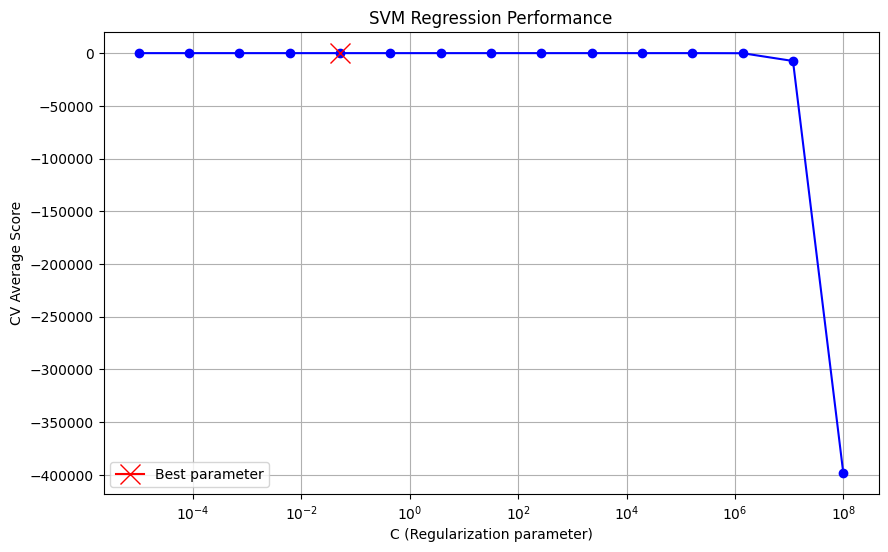

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
svm_reg = SVR(kernel="linear")

svm_cv = GridSearchCV(svm_reg, param_grid, cv=5)
svm_cv.fit(X_train, y_train)
y_pred = svm_cv.predict(X_test)

# EVALUATION
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

print("Tuned SVM regression Parameters: {}".format(svm_cv.best_params_))
print("Best score is {}".format(svm_cv.best_score_))

mean_scores = svm_cv.cv_results_['mean_test_score']

# Plotting
plt.figure(figsize=(10, 6))
plt.semilogx(c_space, mean_scores, marker='o', color='b', linestyle='-')
plt.semilogx(svm_cv.best_params_['C'], svm_cv.best_score_, marker='x', markersize=15, color='r', label='Best parameter')
plt.xlabel('C (Regularization parameter)')
plt.ylabel('CV Average Score')
plt.title('SVM Regression Performance')
plt.legend()
plt.grid(True)
plt.show()

 XGBoost without Grid Search

In [ ]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [54]:
import xgboost as xgb


# Parameters for XGBoost
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'multi:softmax',
    'num_class': 3
}
#initiate model
xgb_model = xgb.XGBRegressor()

# Training the model
num_rounds = 100
xgb_model = xgb_model.fit(params, X_train, num_rounds)
y_pred = xgb_model.predict(dtest)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


XGBoost with Grid Search

Mean Squared Error: 0.003910694872976444
Root Mean Squared Error: 0.062535548874032
Tuned XGBoost Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Best score is 0.9145329564075613


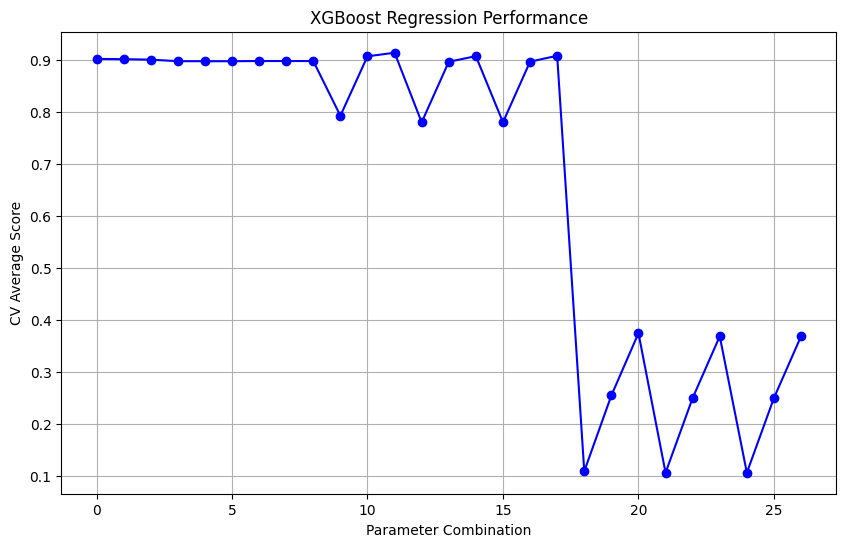

In [58]:


# Define the parameter grid
param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300]
}

# Initialize XGBoost classifier
xgb_model = xgb.XGBRegressor()

# Initialize GridSearchCV
xgb_cv = GridSearchCV(xgb_model, param_grid, cv=5)

# Fit the grid search to the data
xgb_cv.fit(X_train, y_train)

# Make predictions
y_pred = xgb_cv.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

print("Tuned XGBoost Parameters: {}".format(xgb_cv.best_params_))
print("Best score is {}".format(xgb_cv.best_score_))

mean_scores = xgb_cv.cv_results_['mean_test_score']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(len(mean_scores)), mean_scores, marker='o', color='b')
plt.xlabel('Parameter Combination')
plt.ylabel('CV Average Score')
plt.title('XGBoost Regression Performance')
plt.grid(True)
plt.show()
